# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

## 1.Read the dataset to the python environment.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset 
data= pd.read_csv('Wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

The dataset consists of 178 rows and 13 columns.

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


All the features in this dataset are continuous.

### Preprocessing--:

In [7]:
#check for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no missing values in the dataset.

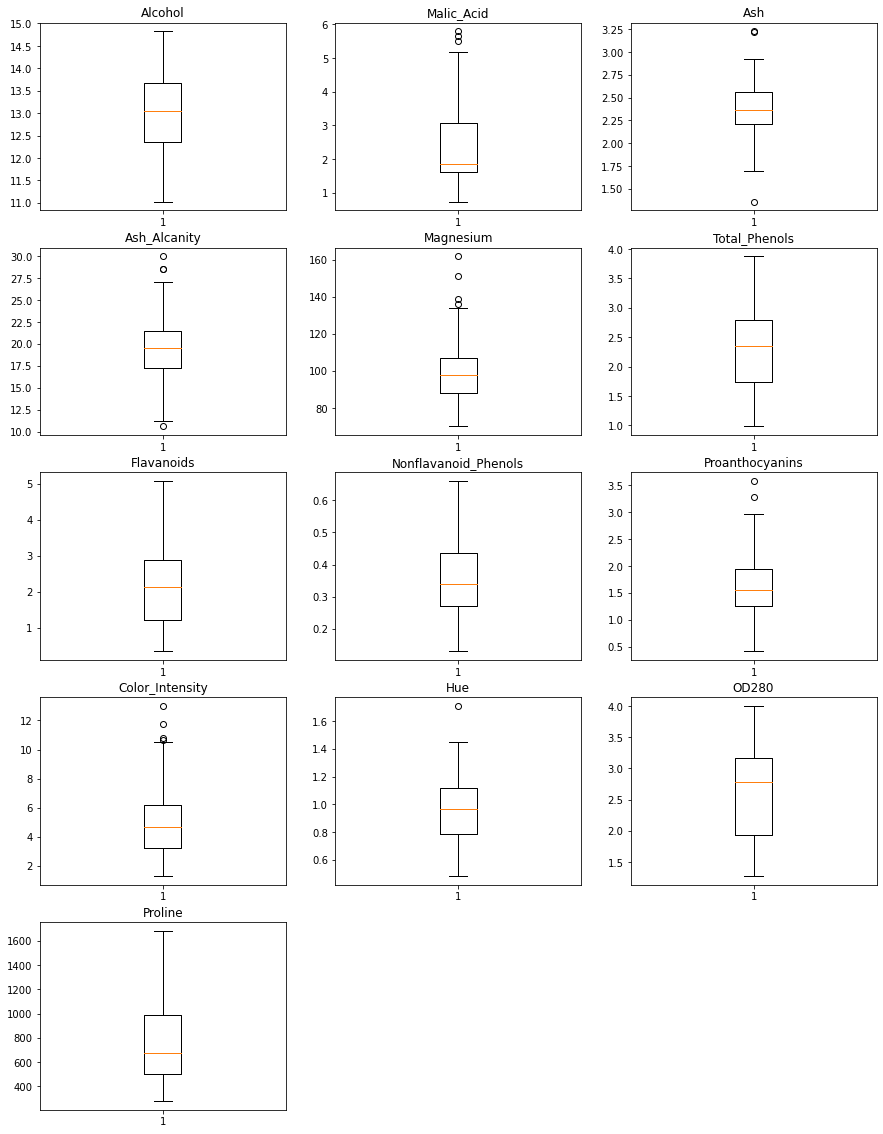

In [8]:
#check for outliers
plt.figure(figsize=(15,20))
for i,feature in enumerate(data.columns):
    plt.subplot(5,3,i+1)
    plt.boxplot(data[feature])
    plt.title(feature)
plt.show()

In [9]:
#handling outliers
outlier_list = ['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']

for feature in outlier_list:
    #finding quartiles
    Q1 = np.percentile(data[feature],25)
    Q3 = np.percentile(data[feature],75)

    #calculating inter quartile range
    IQR = Q3-Q1

    #calculating lower limits and upper limits
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    
    #capping/flooring the outlier at the upper and lower limits
    data[feature] = np.where(data[feature]>upper,upper,np.where(data[feature]<lower,lower,data[feature]))

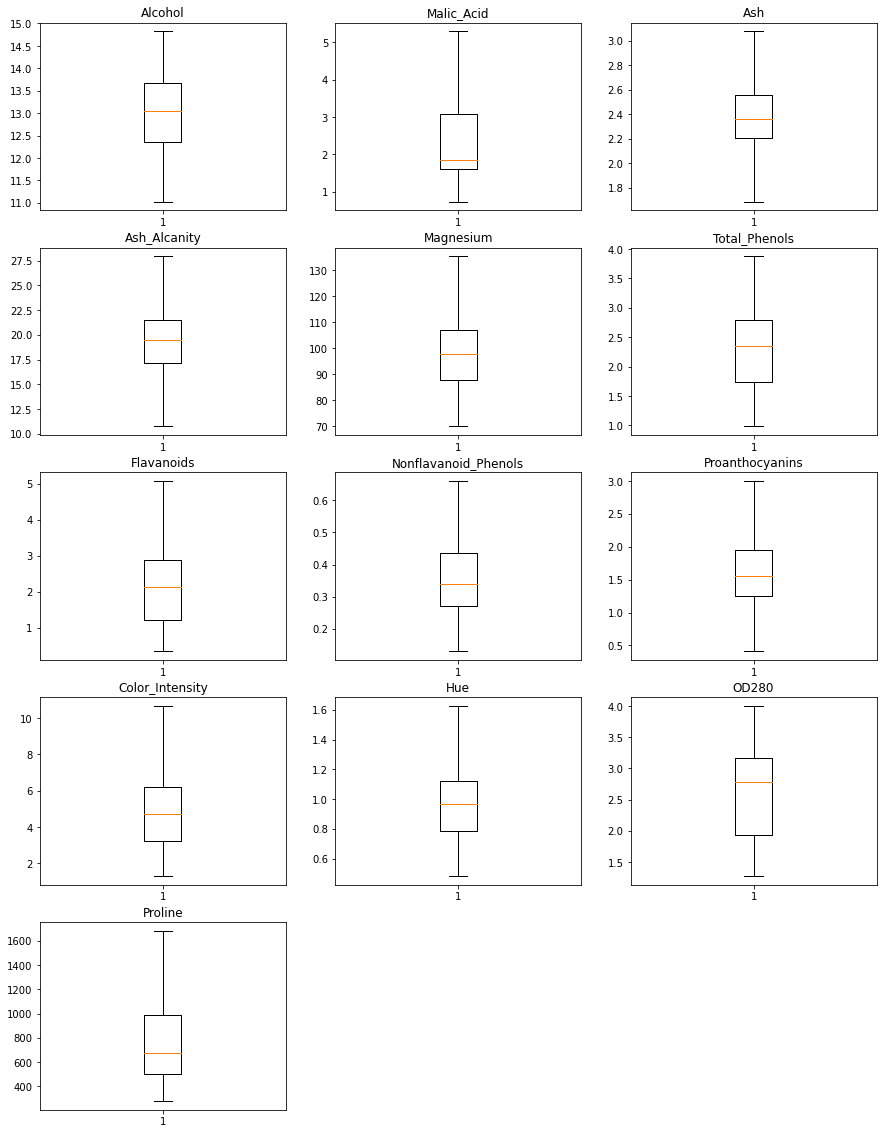

In [10]:
#check again for outliers
plt.figure(figsize=(15,20))
for i,feature in enumerate(data.columns):
    plt.subplot(5,3,i+1)
    plt.boxplot(data[feature])
    plt.title(feature)
plt.show()

Outliers handled successfully using quantile based flooring/capping method. There are no more outliers present in the dataset.

In [11]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df = sc.fit_transform(data)

#converting it into a dataframe
df = pd.DataFrame(df, columns=data.columns)

In [12]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [13]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,1.883637e-16,-4.465841e-16,-2.681999e-16,-1.702758e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,1.503167e-16,-1.197544e-16,7.484650e-18,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515e+00,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


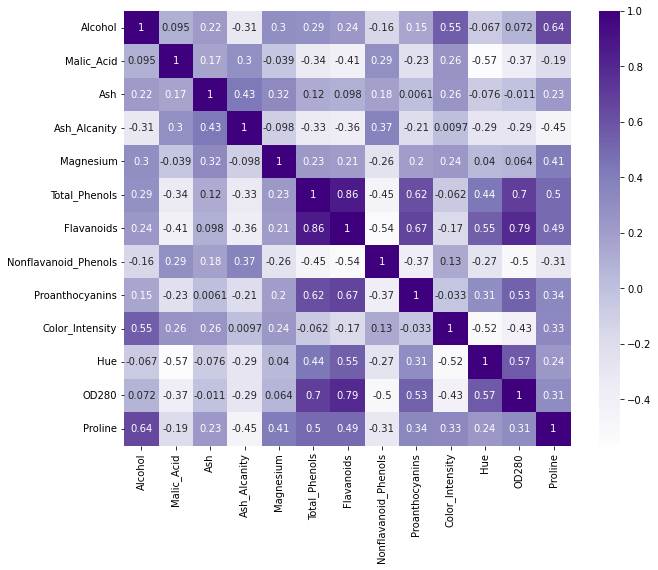

In [14]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Purples')
plt.show()

## 2.Try out different clustering models in the wine dataset.

### K-Means Clustering--:

In [15]:
#import libraries
from sklearn.cluster import KMeans
kmeans=KMeans(init='k-means++', random_state=42)
#fit and predict the data
label_kmeans = kmeans.fit_predict(df)
label_kmeans

array([3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 7,
       3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 7,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 2, 5, 5, 2, 2, 4, 6,
       2, 2, 5, 6, 5, 7, 2, 1, 6, 2, 2, 5, 6, 7, 2, 2, 4, 0, 6, 2, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 6, 6, 2, 2, 7, 2, 2, 7, 2, 2, 4, 2, 4, 2, 7,
       7, 2, 4, 4, 4, 4, 2, 2, 5, 2, 7, 7, 7, 7, 7, 2, 7, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0])

Here we got 8 clusters, because it is the default value for n_clusters.

### Agglomerative Hierarchical clustering--:

In [16]:
#import libraries
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering()
#fit and predict the data
label_hc = hc.fit_predict(df)
label_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

Here we got 2 clusters, because it is the default value for n_clusters.

## 3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### K-Means Clustering--:

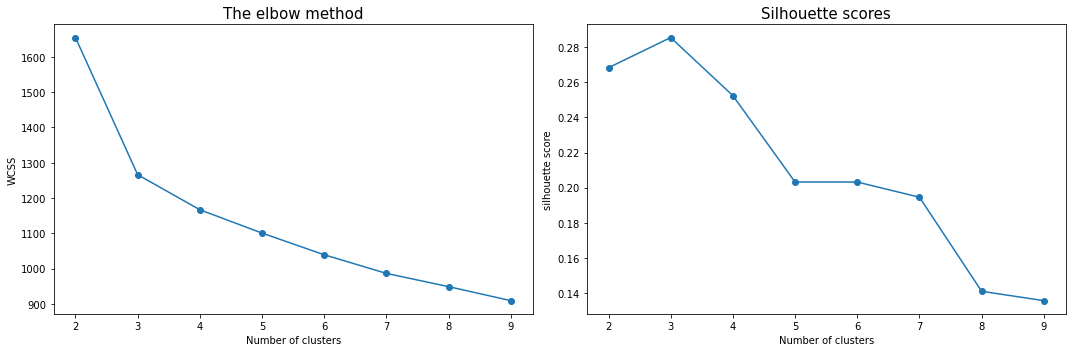

In [27]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#use elbow method and silhouette score to get optimal number of clusters
wcss = []
scores = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model=kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    labels = model.predict(df)
    sil_score = silhouette_score(df,labels)
    scores.append(sil_score)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(range(2,10),wcss,'-o')
plt.title('The elbow method', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,10),scores,'-o')
plt.title('Silhouette scores', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.tight_layout()
plt.show()

From the above plots, it is clear that the optimum number of clusters is 3.

In [28]:
#k-means with number of clusters=3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
label_kmeans = kmeans.fit_predict(df)
label_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [45]:
#evlauate the model
print("Silhouette score of K-Means cluster:",silhouette_score(df,label_kmeans))

Silhouette score of K-Means cluster: 0.2854626783251893


### Agglomerative Hierarchical clustering--:

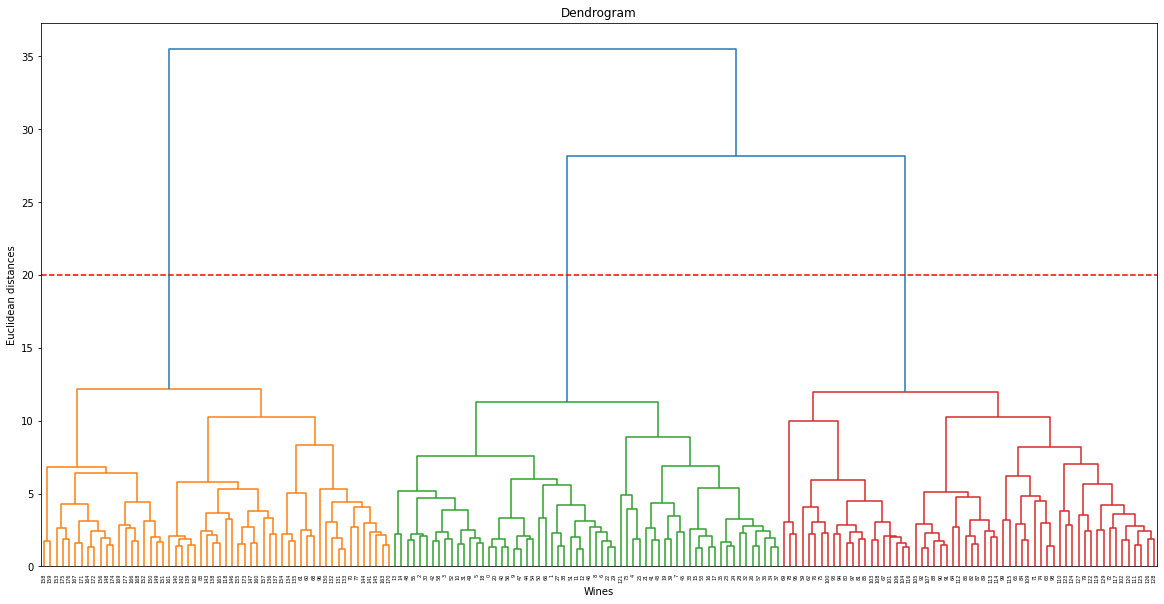

In [41]:
#import libraries
import scipy.cluster.hierarchy as sch
#calculating optimum number of clusters
plt.figure(figsize=(20,10))
dendrogram= sch.dendrogram(sch.linkage(df,method='ward'),leaf_rotation = 90)
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.hlines(20,0,1800,color ='r', linestyle ='dashed')
plt.show()

In [42]:
#implementing Agglomerative HC with 3 clusters
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label_hc = hc.fit_predict(df)
label_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [44]:
#evaluate the model
print("Silhouette score of Agglomerative cluster:",silhouette_score(df,label_hc))

Silhouette score of Agglomerative cluster: 0.2786997668206731


### PCA--:

In [54]:
#import libraries
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_2D = pca.fit_transform(df)
pca_final = pd.DataFrame(data_2D, columns=['First Principal Component', 'Second Principal Component'])
pca_final.head()

,First Principal Component,Second Principal Component
0,3.358147,-1.520222
1,2.229215,0.333261
2,2.540057,-1.036953
3,3.781124,-2.782566
4,1.016872,-0.955225


In [55]:
#convert label_kmeans into data frame
label_kmeans= pd.DataFrame(label_kmeans)
label_kmeans= label_kmeans.rename(columns = {0: 'Labels'})
label_kmeans.head()

,Labels
0,1
1,1
2,1
3,1
4,1


In [56]:
#concat pca_final and label_kmeans
final_df = pd.concat([pca_final, label_kmeans], axis=1)
final_df.head()

,First Principal Component,Second Principal Component,Labels
0,3.358147,-1.520222,1
1,2.229215,0.333261,1
2,2.540057,-1.036953,1
3,3.781124,-2.782566,1
4,1.016872,-0.955225,1


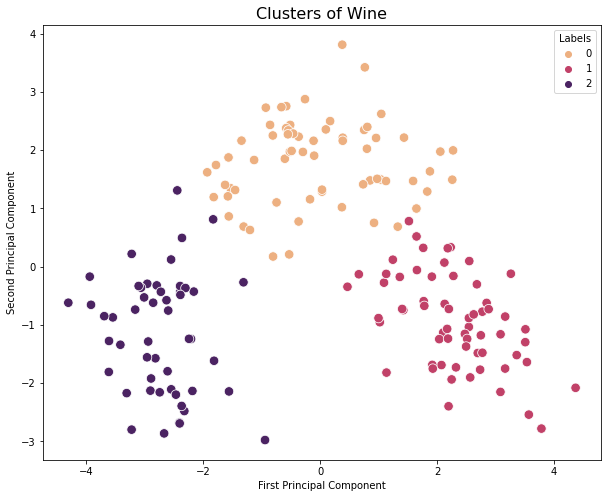

In [77]:
plt.figure(figsize=(10, 8))
plt.title('Clusters of Wine', fontsize=16)
sns.scatterplot(x='First Principal Component', y='Second Principal Component', hue='Labels', data=final_df, palette='flare',s=90, cmap=True);